### Importing required libraries

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt

### Read the data

In [2]:
df_books=pd.read_csv(r'C:\Users\pcs\Desktop\Data science\DS Projects on Python\Recommendation system\books.csv')
df_book_tags=pd.read_csv(r'C:\Users\pcs\Desktop\Data science\DS Projects on Python\Recommendation system\book_tags.csv')
df_ratings=pd.read_csv(r'C:\Users\pcs\Desktop\Data science\DS Projects on Python\Recommendation system\ratings.csv')
df_tags=pd.read_csv(r'C:\Users\pcs\Desktop\Data science\DS Projects on Python\Recommendation system\tags.csv')

In [3]:
df_books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
df_books.iloc[:,0:10].head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby


In [5]:
df_books.iloc[:,11:16].head()

,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count
0,eng,4.34,4780653,4942365,155254
1,eng,4.44,4602479,4800065,75867
2,en-US,3.57,3866839,3916824,95009
3,eng,4.25,3198671,3340896,72586
4,eng,3.89,2683664,2773745,51992


In [6]:
df_books.iloc[:,17:23].head()

,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [7]:
df_books.shape

(10000, 23)

In [8]:
df_tags.head(2)
print(df_tags.shape)

(34252, 2)


In [9]:
df_ratings.head(2)

,book_id,user_id,rating
0,1,314,5
1,1,439,3


In [10]:
df_book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [11]:
# Drop the useless columns
df_books = df_books.drop(columns=['id', 'best_book_id', 'work_id', 'isbn', 'isbn13', 'title','work_ratings_count',
                                   'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 
                                    'image_url','small_image_url'])

In [12]:
df_books.head()

,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
0,2767052,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479
2,41865,226,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664


In [13]:
df_books.shape

(10000, 8)

In [14]:
# Check the nulls
df_books.isna().sum()

book_id                         0
books_count                     0
authors                         0
original_publication_year      21
original_title                585
language_code                1084
average_rating                  0
ratings_count                   0
dtype: int64

In [15]:
# Drop the nulls
df_books= df_books.dropna()

In [16]:
df_books.shape

(8405, 8)

In [17]:
df_ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [18]:
df_ratings=df_ratings.sort_values('user_id')
df_ratings

,book_id,user_id,rating
117889,1180,1,4
488112,4893,1,3
625717,6285,1,4
796318,8034,2,4
875008,8855,2,5
...,...,...,...
912886,9255,53424,4
818162,8262,53424,4
777143,7833,53424,4
716608,7212,53424,4


In [19]:
# Drop the duplicates
df_ratings=df_ratings.drop_duplicates(subset=(['user_id', 'rating']))

In [20]:
df_ratings.shape

(153827, 3)

In [21]:
df_books['original_title'].nunique()

8283

In [22]:
df_books= df_books.drop_duplicates(subset='original_title')

In [23]:
df_books.head()

,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
0,2767052,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479
2,41865,226,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664


In [24]:
df_books.shape

(8283, 8)

In [25]:
df_tags


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
...,...,...
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ


In [26]:
df_tags= df_tags.drop_duplicates(subset='tag_id')

In [27]:
df_book_tags


,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


In [28]:
df_book_tags=df_book_tags.drop_duplicates(subset=['goodreads_book_id', 'tag_id'])

In [29]:
df_book_tags

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


### Data cleaning

In [30]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

### Data visualization

In [31]:
import plotly.graph_objs as go
from plotly.offline import  init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import plotly_express as px

In [32]:
top_rated_books = df_books.sort_values('average_rating', ascending=False)
top_rated_books

,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
3627,24812,14,Bill Watterson,2005.0,The Complete Calvin and Hobbes,eng,4.82,28900
861,17332218,34,Brandon Sanderson,2014.0,Words of Radiance,eng,4.77,73572
8853,95602,6,Francine Rivers,1993.0,Mark of the Lion Trilogy,en-US,4.76,9081
4482,24814,21,Bill Watterson,1996.0,It's a Magical World: A Calvin and Hobbes Coll...,eng,4.75,22351
6360,70489,22,Bill Watterson,1996.0,There's Treasure Everywhere: A Calvin and Hobb...,eng,4.74,16766
...,...,...,...,...,...,...,...,...
8165,23503361,19,Julia Pierpont,2015.0,Parmi les dix milliers de choses,eng,2.84,8458
9020,24929,18,"Gregory Maguire, Douglas Smith",2001.0,Lost,eng,2.80,12534
8006,8664368,45,Howard Jacobson,2010.0,The Finkler Question,eng,2.76,9627
3549,783291,63,Alice Sebold,2007.0,The Almost Moon,eng,2.67,28299


In [33]:
top_rated_books = df_books.sort_values('average_rating', ascending=False)
tf_top_rated = top_rated_books[:20]
fig = px.bar(tf_top_rated, x="average_rating", y="original_title", title='Top Rated Books and Their Ratings',
             orientation='h', color='original_title', width=1500, height=700)
fig.show()

In [34]:
topsecond_rated_books = df_books.sort_values('average_rating', ascending=False)
tf_top_rated = topsecond_rated_books[21:40]
fig = px.bar(tf_top_rated, x="average_rating", y="original_title", title='Top Rated Books and Their Ratings',
             orientation='h', color='original_title', width=1500, height=700)
fig.show()

In [35]:
fig = px.treemap(tf_top_rated, path=['original_title'], values='average_rating',title='Top Rated Books', width=1000, height=700)
fig.show()

In [37]:
fifty_top_authors = tf_top_rated[:50]
fig = px.treemap(fifty_top_authors, path=['authors'], values='average_rating',title='Popular Authors', width=1000, height=700)
fig.show()

In [38]:
# Remove the stopwords
stop_words=set(STOPWORDS)
author_string = " ".join(df_books['authors'])
title_string = " ".join(df_books['original_title'])

In [41]:
def wordcloud(string):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21, max_font_size=110,stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(wc)

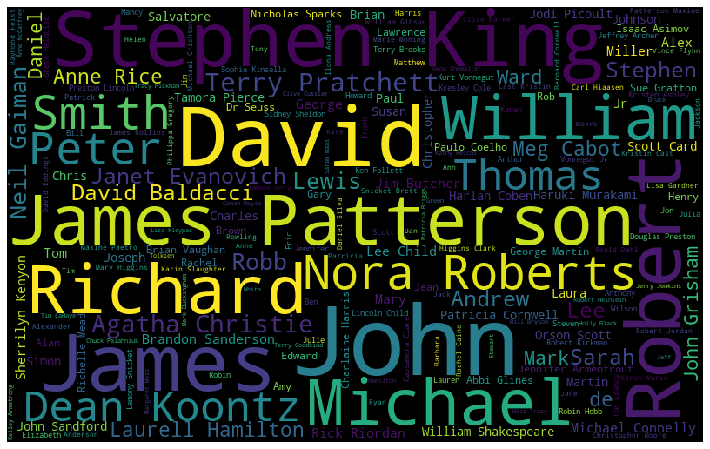

In [42]:
wordcloud(author_string)

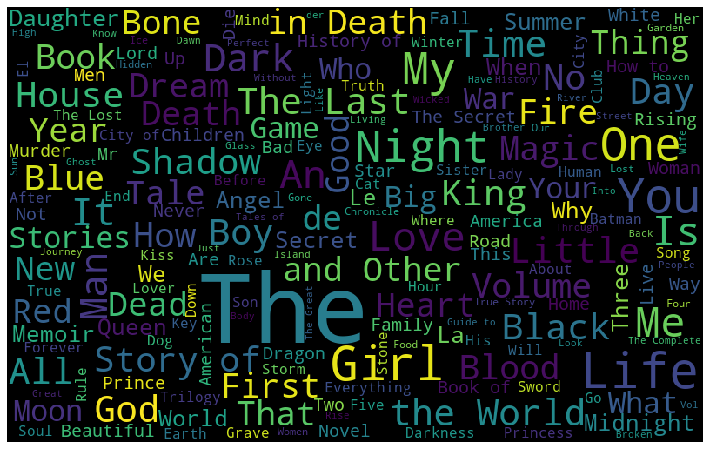

In [46]:
wordcloud(title_string)

## Content Based Recommendation

In [ ]:
content_data = df_books[['original_title','authors','average_rating']]
content_data = content_data.astype(str)

In [47]:
df_books.head()

,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
0,2767052,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479
2,41865,226,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664


In [50]:
content_data.head()

,original_title,authors,average_rating
0,The Hunger Games,Suzanne Collins,4.34
1,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",4.44
2,Twilight,Stephenie Meyer,3.57
3,To Kill a Mockingbird,Harper Lee,4.25
4,The Great Gatsby,F. Scott Fitzgerald,3.89


In [51]:
content_data['content'] = content_data['original_title'] + ' ' + content_data['authors'] + ' ' + content_data['average_rating']

In [52]:
content_data.head()

,original_title,authors,average_rating,content
0,The Hunger Games,Suzanne Collins,4.34,The Hunger Games Suzanne Collins 4.34
1,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",4.44,Harry Potter and the Philosopher's Stone J.K. ...
2,Twilight,Stephenie Meyer,3.57,Twilight Stephenie Meyer 3.57
3,To Kill a Mockingbird,Harper Lee,4.25,To Kill a Mockingbird Harper Lee 4.25
4,The Great Gatsby,F. Scott Fitzgerald,3.89,The Great Gatsby F. Scott Fitzgerald 3.89


In [53]:
content_data['content']

0                   The Hunger Games Suzanne Collins 4.34
1       Harry Potter and the Philosopher's Stone J.K. ...
2                           Twilight Stephenie Meyer 3.57
3                   To Kill a Mockingbird Harper Lee 4.25
4               The Great Gatsby F. Scott Fitzgerald 3.89
                              ...                        
9994              Billy Budd, Sailor Herman Melville 3.09
9995                        Bayou Moon Ilona Andrews 4.09
9996                 Means of Ascent  Robert A. Caro 4.25
9997           The Mauritius Command Patrick O'Brian 4.35
9998    Cinderella Ate My Daughter: Dispatches from th...
Name: content, Length: 8283, dtype: object

In [ ]:
content_data = content_data.reset_index()
indices = pd.Series(content_data.index, index=content_data['original_title'])

In [57]:
content_data = content_data.reset_index()
indices = pd.Series(content_data.index, index=content_data['original_title'])

In [56]:
content_data.head()

,index,original_title,authors,average_rating,content
0,0,The Hunger Games,Suzanne Collins,4.34,The Hunger Games Suzanne Collins 4.34
1,1,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",4.44,Harry Potter and the Philosopher's Stone J.K. ...
2,2,Twilight,Stephenie Meyer,3.57,Twilight Stephenie Meyer 3.57
3,3,To Kill a Mockingbird,Harper Lee,4.25,To Kill a Mockingbird Harper Lee 4.25
4,4,The Great Gatsby,F. Scott Fitzgerald,3.89,The Great Gatsby F. Scott Fitzgerald 3.89


In [58]:
indices

original_title
The Hunger Games                                                                                0
Harry Potter and the Philosopher's Stone                                                        1
Twilight                                                                                        2
To Kill a Mockingbird                                                                           3
The Great Gatsby                                                                                4
                                                                                             ... 
Billy Budd, Sailor                                                                           8278
Bayou Moon                                                                                   8279
Means of Ascent                                                                              8280
The Mauritius Command                                                                        8281
Cinde

In [60]:
import re
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [61]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(content_data['authors'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8283, 5493)

In [62]:
cosine_sim_author = linear_kernel(tfidf_matrix, tfidf_matrix)

In [64]:
cosine_sim_author[1:10]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
def get_recommendations_books(title, cosine_sim=cosine_sim_author):
    idx = indices[title]

    # Get the pairwsie similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim_author[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return list(content_data['original_title'].iloc[book_indices])

In [71]:
def author_book_shows(book):
    for book in book:
        print(book)

In [75]:
books1 = get_recommendations_books('To Kill a Mockingbird', cosine_sim_author)
author_book_shows(books1)

Go Set a Watchman
Passion's Reign
The Dry
Nice Girls Don't Have Fangs (Jane Jameson, #1)
Killing Floor
One Shot
Die Trying (Jack Reacher, #2)
Tripwire
Worth Dying For
The Visitor


In [73]:
df_books.columns

Index(['book_id', 'books_count', 'authors', 'original_publication_year',
       'original_title', 'language_code', 'average_rating', 'ratings_count'],
      dtype='object')

In [74]:
df_books['original_title']

0                                        The Hunger Games
1                Harry Potter and the Philosopher's Stone
2                                                Twilight
3                                   To Kill a Mockingbird
4                                        The Great Gatsby
                              ...                        
9994                                   Billy Budd, Sailor
9995                                           Bayou Moon
9996                                     Means of Ascent 
9997                                The Mauritius Command
9998    Cinderella Ate My Daughter: Dispatches from th...
Name: original_title, Length: 8283, dtype: object

In [76]:
books1 = get_recommendations_books('To Kill a Mockingbird', cosine_sim_author)
author_book_shows(books1)

Go Set a Watchman
Passion's Reign
The Dry
Nice Girls Don't Have Fangs (Jane Jameson, #1)
Killing Floor
One Shot
Die Trying (Jack Reacher, #2)
Tripwire
Worth Dying For
The Visitor


In [77]:
books3 = get_recommendations_books('Harry Potter and the Goblet of Fire', cosine_sim_author)
author_book_shows(books3)

Harry Potter and the Order of the Phoenix
Harry Potter and the Chamber of Secrets
Harry Potter and the Goblet of Fire
Harry Potter and the Deathly Hallows
Harry Potter and the Half-Blood Prince
Harry Potter Boxed Set Books 1-4
Harry Potter and the Prisoner of Azkaban
The Casual Vacancy
The Tales of Beedle the Bard
Complete Harry Potter Boxed Set


## Content Based Filtering On multiple matrix

In [79]:
content_data['content'].head()

0                The Hunger Games Suzanne Collins 4.34
1    Harry Potter and the Philosopher's Stone J.K. ...
2                        Twilight Stephenie Meyer 3.57
3                To Kill a Mockingbird Harper Lee 4.25
4            The Great Gatsby F. Scott Fitzgerald 3.89
Name: content, dtype: object

In [80]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(content_data['content'])

cosine_sim_content = cosine_similarity(count_matrix, count_matrix)

In [81]:
cosine_sim_content

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [82]:
def get_recommendations(title, cosine_sim=cosine_sim_content):
    idx = indices[title]

    # Get the pairwsie similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim_content[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return list(content_data['original_title'].iloc[book_indices])

In [83]:
def book_shows(book):
    for book in book:
        print(book)

In [84]:
books4 = get_recommendations('The Two Towers', cosine_sim_content)
book_shows(books4)

Towers of Midnight
The Silmarillion
The Children of Húrin
The Hobbit or There and Back Again
Reckless
 The Fellowship of the Ring
The Return of the King
The Lord of the Rings
Last Sacrifice 
Roots


In [85]:
books5 =get_recommendations('Reckless', cosine_sim_content)
book_shows(books5)

The Two Towers
Thoughtless
Effortless
Last Sacrifice 
Roots
Two States
From a Buick 8
孫悟空と仲間たち
The Expats
The Bonehunters


In [86]:
books5 =get_recommendations('孫悟空と仲間たち', cosine_sim_content)
book_shows(books5)

The Two Towers
Reckless
Last Sacrifice 
Roots
Two States
From a Buick 8
The Expats
The Bonehunters
The Middlesteins
H.M.S. Surprise 
